In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
import networkx as nx
import numpy as np
import sys
import pandas as pd
sys.path.insert(0,'..')
from src.data.data_loader import GraphDataset

In [18]:
datasets = 'cora citeseer pubmed cora_full twitter webkb'.split()
# datasets += 'cornell texas washington wisconsin'.split()
# datasets.append('webkb')
# datasets.append('twitter')

In [19]:
formal_name = {'cora':'CORA-ML', 'citeseer':'CiteSeer' ,'pubmed':'PubMed', 'cora_full':'CORA-Full',
              'cornell':'Cornell', 'texas':'Texas', 'washington':'Washington',  'wisconsin':'Wisconsin',
              'twitter':'Twitter', 'webkb':'WebKB'}

In [22]:

print('\\toprule')
print('Dataset & Labels & Features & Nodes & Edges & Edge density & Label rate \\\\')
print('\\midrule')
for dataset_name in datasets:
    dataset = GraphDataset(f'../data/tmp/{dataset_name}_directed', dataset_name,
                       f'../data/graphs/processed/{dataset_name}/{dataset_name}.cites',
                       f'../data/graphs/processed/{dataset_name}/{dataset_name}.content',
                       directed=True, reverse=False)[0]
    classes = dataset.y.unique().shape[0]
    nodes = dataset.x.shape[0]
    features = dataset.x.shape[1]
    edges = dataset.edge_index.shape[1]
    label_rate = classes*20 / nodes
    if dataset_name == 'webkb':
        label_rate = classes*10 / nodes
    edge_density = edges / (nodes * nodes)
    print(f'{formal_name[dataset_name]} & {classes:,} & {features:,} & {nodes:,} & {edges:,} & {edge_density:.4f} & {label_rate:.4f} \\\\')
    
print('\\bottomrule')

\toprule
Dataset & Labels & Features & Nodes & Edges & Edge density & Label rate \\
\midrule
CORA-ML & 7 & 1,433 & 2,485 & 5,209 & 0.0008 & 0.0563 \\
CiteSeer & 6 & 3,703 & 2,110 & 3,705 & 0.0008 & 0.0569 \\
PubMed & 3 & 500 & 19,717 & 44,335 & 0.0001 & 0.0030 \\
CORA-Full & 67 & 8,710 & 18,703 & 64,259 & 0.0002 & 0.0716 \\
Twitter & 2 & 215 & 2,134 & 7,040 & 0.0015 & 0.0187 \\
WebKB & 5 & 1,703 & 859 & 1,516 & 0.0021 & 0.0582 \\
\bottomrule


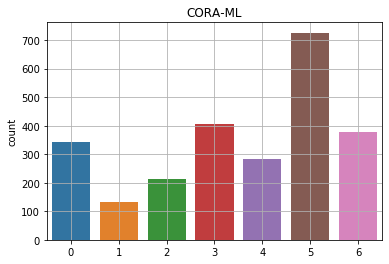

Constant classifier accuracy: 29.22


<Figure size 432x288 with 0 Axes>

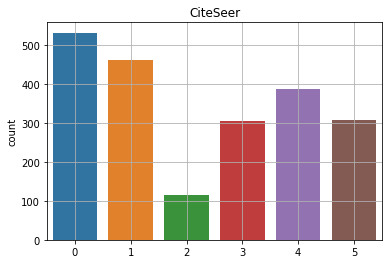

Constant classifier accuracy: 25.21


<Figure size 432x288 with 0 Axes>

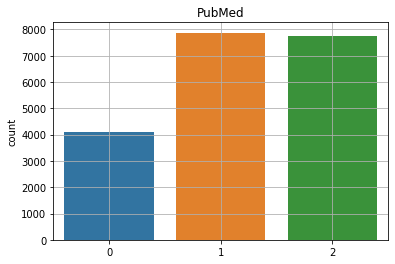

Constant classifier accuracy: 39.94


<Figure size 432x288 with 0 Axes>

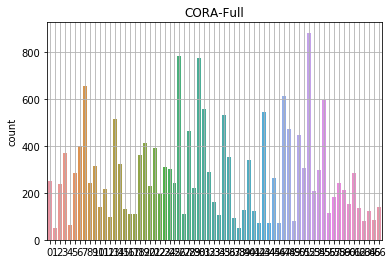

Constant classifier accuracy: 4.72


<Figure size 432x288 with 0 Axes>

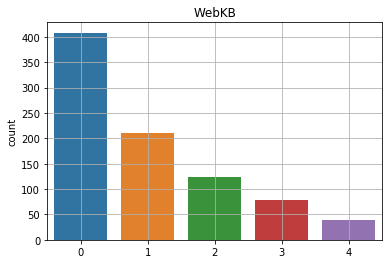

Constant classifier accuracy: 47.50


<Figure size 432x288 with 0 Axes>

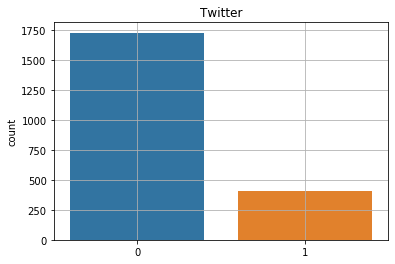

Constant classifier accuracy: 80.83


<Figure size 432x288 with 0 Axes>

In [11]:
for dataset_name in datasets:
    dataset = GraphDataset(f'../data/tmp/{dataset_name}_directed', dataset_name,
                       f'../data/graphs/processed/{dataset_name}/{dataset_name}.cites',
                       f'../data/graphs/processed/{dataset_name}/{dataset_name}.content',
                       directed=True, reverse=False)[0]
    plt.figure()
    labels = [int(x) for x in dataset.y.numpy()]
    sns.countplot(labels)
    plt.title(formal_name[dataset_name])
    plt.grid()
    plt.show()
    
    plt.savefig(f'../reports/figures/label_distribution/{dataset_name}.pdf',bbox_inches='tight')
    
    bincount = np.bincount(np.array(labels))
    print(f'Constant classifier accuracy: {100*bincount.max()/bincount.sum():.2f}')

    

In [13]:
def plot_distribution(data,filename=None,degreetype=None):
    plt.figure()
    """ Plot Distribution """
    xi = np.arange(len(data))+1
    y = data +1
    m, c = np.polyfit(np.log(xi), np.log(y), 1) # fit log(y) = m*log(x) + c
    y_fit = np.exp(m*np.log(xi) + c) # calculate the fitted values of y 
#     plt.plot(xi, y_fit, 'r--')
    plt.plot(range(len(data)),data,'b.')

    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('Freq')
    plt.xlabel('Degree')
#     plt.title(degreetype)
    plt.grid()
#         plt.savefig(filename + degreetype + 'distributionext.pdf',bbox_inches='tight')
#     slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(xi),np.log(y))
#     line = np.exp(slope*np.log(xi)+intercept)
#     popt, pcov = curve_fit(myExpFunc, xi, y)
#     plt.plot(xi, myExpFunc(xi, *popt), 'r-', 
#          label=\"({0:.3f}*x**{1:.3f})\".format(*popt))
def plot_outdegree_distribution(G):
    dout = [G.out_degree(x) for x in G.nodes()]
    plot_distribution(np.bincount(dout))
def plot_indegree_distribution(G):
    din = [G.in_degree(x) for x in G.nodes()]
    plot_distribution(np.bincount(din))
def plot_degree_distribution(G):
    din = [G.in_degree(x) for x in G.nodes()]
    dout = [G.out_degree(x) for x in G.nodes()]
    plot_distribution(np.bincount(din))
    plot_distribution(np.bincount(dout))

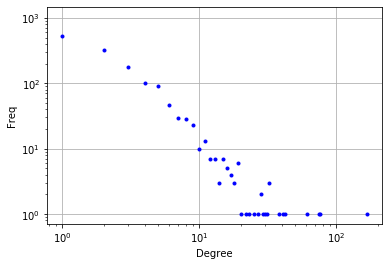

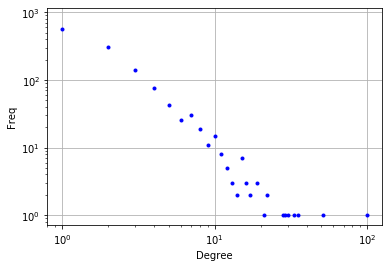

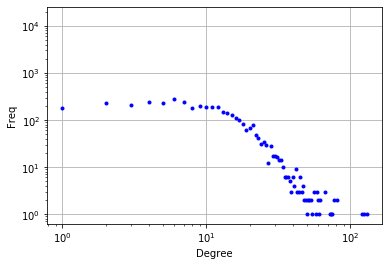

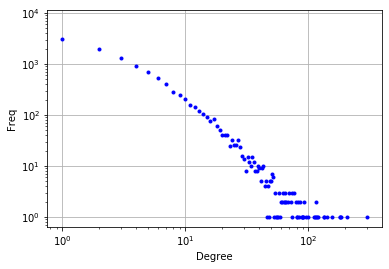

In [10]:
for dataset_name in datasets:
    dataset = GraphDataset(f'../data/tmp/{dataset_name}_directed', dataset_name,
                       f'../data/graphs/processed/{dataset_name}/{dataset_name}.cites',
                       f'../data/graphs/processed/{dataset_name}/{dataset_name}.content',
                       directed=True, reverse=False)[0]    
    plot_indegree_distribution(to_networkx(dataset))

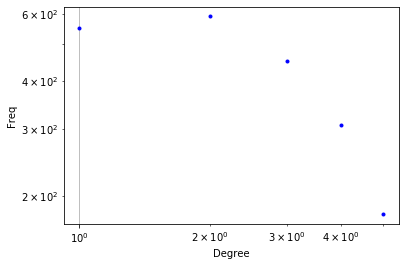

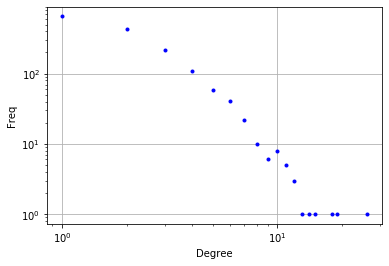

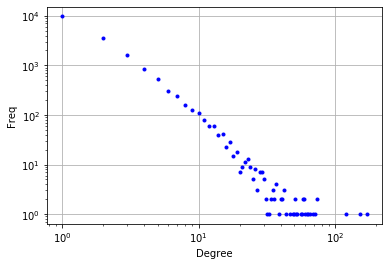

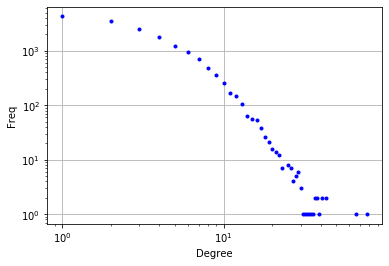

In [11]:
for dataset_name in datasets:
    dataset = GraphDataset(f'../data/tmp/{dataset_name}_directed', dataset_name,
                       f'../data/graphs/processed/{dataset_name}/{dataset_name}.cites',
                       f'../data/graphs/processed/{dataset_name}/{dataset_name}.content',
                       directed=True, reverse=False)[0]
    plot_outdegree_distribution(to_networkx(dataset))

In [14]:
def scatter_facet():
    dfs = []
    for dataset_name in datasets:
        dataset = CitationNetwork(f'/tmp/{dataset_name}3_directed',dataset_name,directed=True)[0]
        G = to_networkx(dataset)
        dout = [G.out_degree(x) for x in G.nodes()]
        din = [G.in_degree(x) for x in G.nodes()]
        cdf = pd.DataFrame({"din":din,"dout":dout})
        cdf['dataset'] = dataset_name
        dfs.append(cdf)
    df = pd.concat(dfs,ignore_index = True)
    g = sns.FacetGrid(df, col="dataset",sharey=True,heighat=4,aspect=aspect,palette=sns.color_palette('colorblind'),legend_out=legend_out)
    bp = g.map(sns.jointplot, "dout", "din")
#                    ,hue_col,
#                    order=df[x_col].unique(),
#                    hue_order=(sorted(df[hue_col].unique()) if hue_order is None else hue_order),
#                    palette='colorblind')

In [5]:
def heatmap(G):
    df = pd.DataFrame([{'node':x,'in_degree':G.in_degree(x),'out_degree':G.out_degree(x)} for x in G.nodes()])
    df = df.pivot_table(index='out_degree',columns='in_degree',values='node',aggfunc=lambda x:len(x)).fillna(0)
    df = np.log2(df+1)
    plt.figure()
    sns.heatmap(df)
    plt.show()

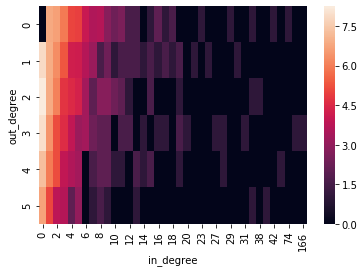

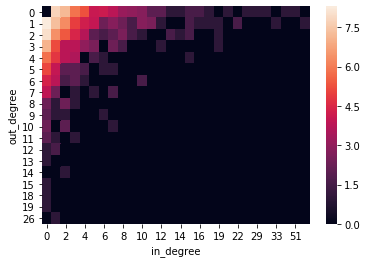

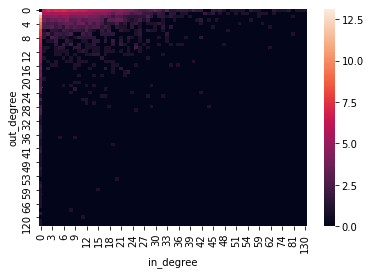

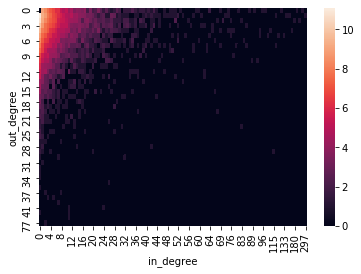

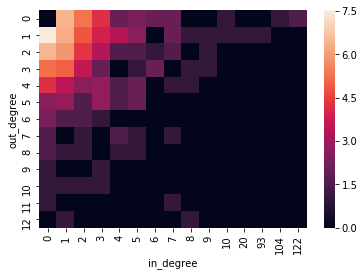

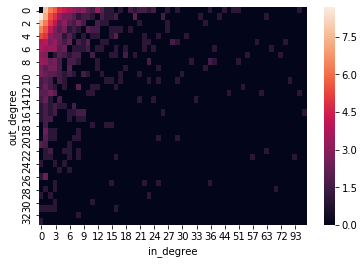

In [12]:
for dataset_name in datasets:
    dataset = GraphDataset(f'../data/tmp/{dataset_name}_directed', dataset_name,
                       f'../data/graphs/processed/{dataset_name}/{dataset_name}.cites',
                       f'../data/graphs/processed/{dataset_name}/{dataset_name}.content',
                       directed=True, reverse=False)[0]
    G = to_networkx(dataset)
    uG = G.to_undirected()
    heatmap(G)

In [6]:
def scatter_inout_degree(G, filename=None):
    dout = [G.out_degree(x) for x in G.nodes()]
    din = [G.in_degree(x) for x in G.nodes()]
    dout = np.array([np.log2(x+1) for x in dout])
    din = np.array([np.log2(x+1) for x in din])
    lim = max(din+dout)
    plt.figure(figsize=(7,7))
    with sns.axes_style("white"):
        g = sns.jointplot(x=dout, y=din, kind="kde", color="k")
#         g.ax_joint.set_xscale('log')
#         g.ax_joint.set_yscale('log')
        g.ax_joint.set_ylabel('log2(In degree)')
        g.ax_joint.set_xlabel('log2(Out degree)')
        g.ax_joint.set_xlim([-1,lim])
        g.ax_joint.set_ylim([-1,lim])
#     plt.plot(dout,din,'b.')
#     plt.yscale('log')
#     plt.xscale('log')
#     plt.grid()
#     plt.ylabel('In degree')
#     plt.xlabel('Out degree')
#     plt.savefig(filename+'.pdf',bbox_inches='tight')

<Figure size 504x504 with 0 Axes>

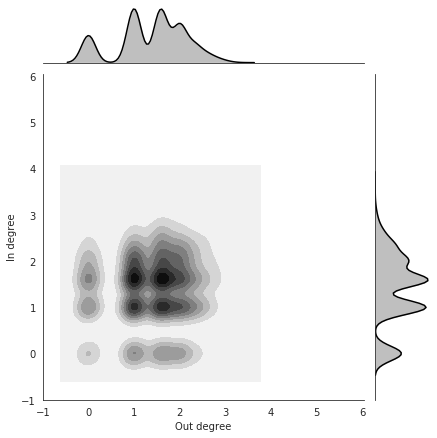

<Figure size 504x504 with 0 Axes>

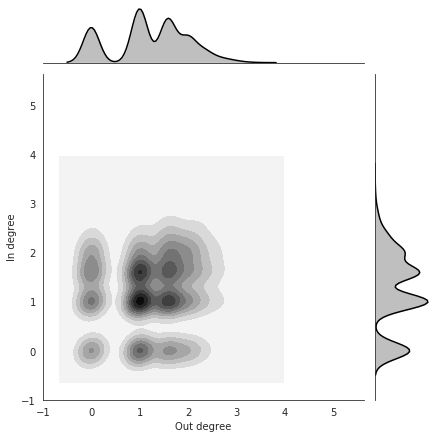

<Figure size 504x504 with 0 Axes>

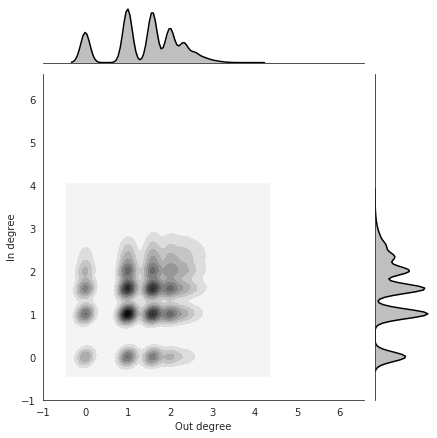

<Figure size 504x504 with 0 Axes>

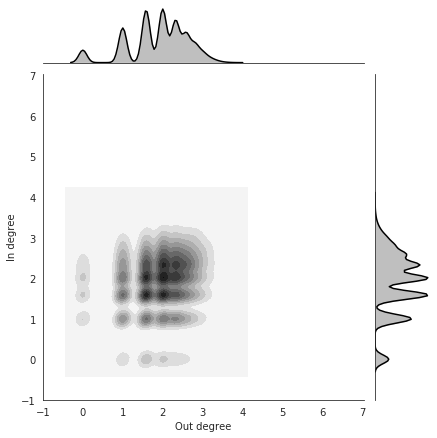

In [141]:
for dataset_name in datasets:
    i = 0
    dataset = GraphDataset(f'../data/tmp/{dataset_name}_directed-sbm{i}', dataset_name,
                       f'../data/graphs/sbm/{dataset_name}/{dataset_name}_sbm_{i}.cites',
                       f'../data/graphs/processed/{dataset_name}/{dataset_name}.content',
                       directed=True, reverse=False)[0]
    G = to_networkx(dataset)
    uG = G.to_undirected()
    scatter_inout_degree(G)

<Figure size 504x504 with 0 Axes>

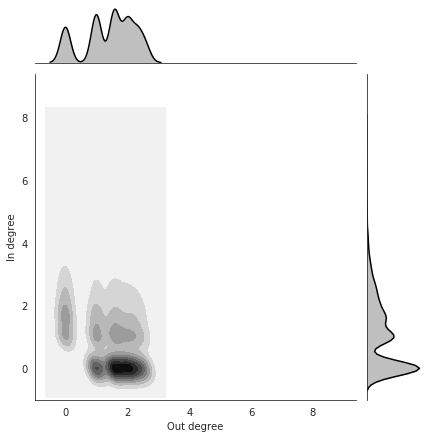

<Figure size 504x504 with 0 Axes>

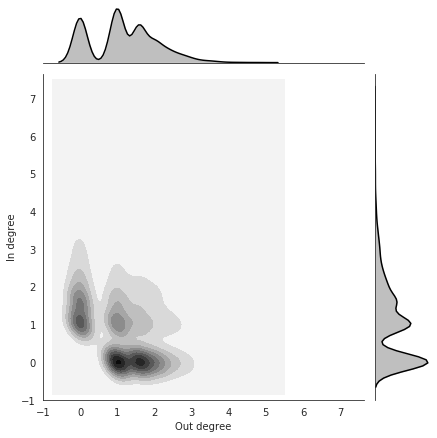

<Figure size 504x504 with 0 Axes>

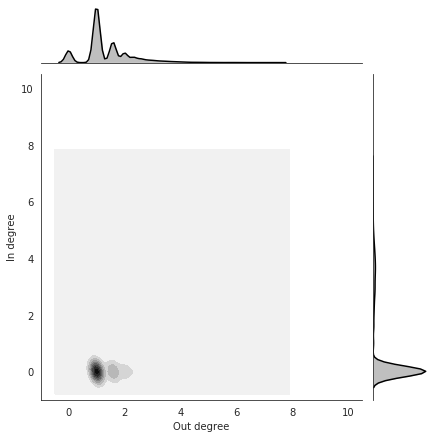

<Figure size 504x504 with 0 Axes>

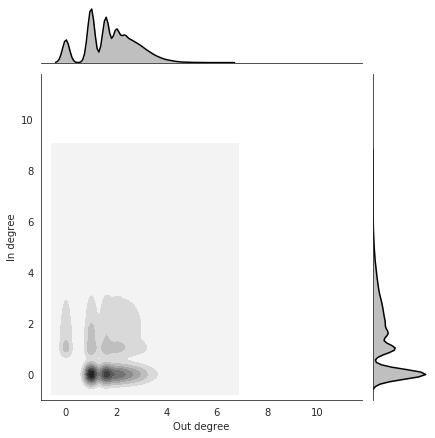

In [139]:
for dataset_name in datasets:
    dataset = GraphDataset(f'../data/tmp/{dataset_name}_directed', dataset_name,
                       f'../data/graphs/processed/{dataset_name}/{dataset_name}.cites',
                       f'../data/graphs/processed/{dataset_name}/{dataset_name}.content',
                       directed=True, reverse=False)[0]
    G = to_networkx(dataset)
    uG = G.to_undirected()
    scatter_inout_degree(G)

In [7]:
import pickle
def load_communities(path):
    with open(path, 'rb') as handle:
        ret = pickle.load(handle)
    return ret
def load_labels(path):
    label = {}
    with open(path, 'r') as handle:
        label = {}
        for line in handle:
            s = line.strip().split()
            label[s[0]] = s[-1]
    return label

In [8]:
def agg(x):
    return len(x.unique())

cora 2.508-1.037 = 1.471
cora IG/H = 0.586


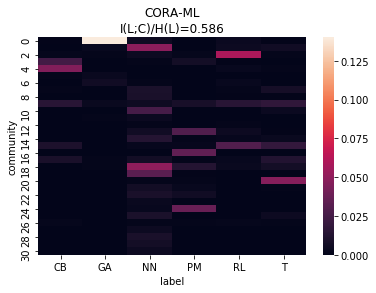

citeseer 2.467-1.263 = 1.204
citeseer IG/H = 0.488


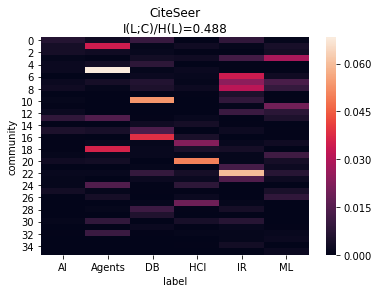

pubmed 1.530-0.912 = 0.617
pubmed IG/H = 0.404


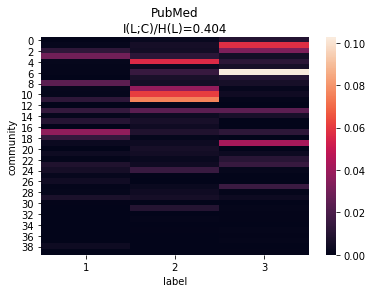

cora_full 5.748-3.207 = 2.541
cora_full IG/H = 0.442


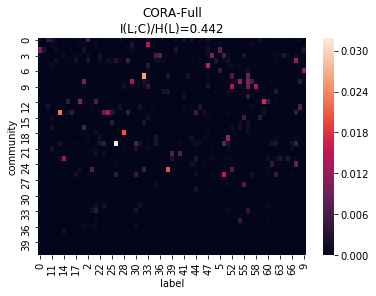

webkb 1.926-1.772 = 0.154
webkb IG/H = 0.080


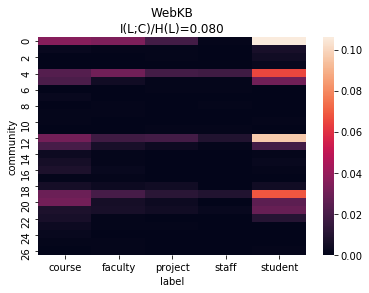

twitter 0.705-0.501 = 0.204
twitter IG/H = 0.289


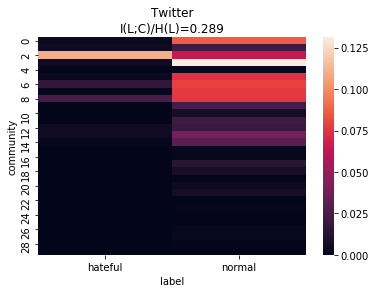

In [13]:
for dataset_name in datasets:
    
    community = load_communities(f'../data/community_id_dicts/{dataset_name}/{dataset_name}_louvain.pickle')
    label = load_labels(f'../data/graphs/processed/{dataset_name}/{dataset_name}.content')
    df_community = pd.DataFrame({'dataset':dataset_name, 'node':node, 'community':community[node], 'label':label[node]} for node in community)
    
    if dataset_name == 'cora':
        df_community.label = df_community.label.apply(lambda x : ''.join([c for c in x if c.isupper()]))
    
    mtx = df_community.pivot_table(index='community', columns='label',values='node',aggfunc=agg).fillna(0) / len(label)
    plt.figure()
    sns.heatmap(mtx)
    
    communities = df_community.community.unique()
    labels = df_community.label.unique()
    
    def Pmarg(c):
        return len(df_community[df_community.community == c]) / len(df_community)
    
    def Pcond(l,c):
        return mtx.loc[c,l]/Pmarg(c)
    
    H = 0
    for c in communities:
        h = 0
        for l in labels:
            if Pcond(l,c) == 0:
                continue
            h += Pcond(l,c) * np.log2(1./Pcond(l,c))
        H += h * Pmarg(c)
    
    def Pl(l):
        return len(df_community[df_community.label == l]) / len(df_community)
    
    Hl = 0
    for l in labels:
        if Pl(l) == 0:
            continue
        Hl += Pl(l) * np.log2(1./Pl(l))
    
    IG = Hl-H
    
    print(f'{dataset_name} {Hl:.3f}-{H:.3f} = {IG:.3f}')
    print(f'{dataset_name} IG/H = {IG/Hl:.3f}')
    # H(L)={Hl:.3f}, I(L;C)={IG:.3f}, 
    plt.title(f'{formal_name[dataset_name]}\nI(L;C)/H(L)={IG/Hl:.3f}')
    plt.savefig(f'../reports/figures/community_information_gain/{dataset_name}.pdf',bbox_inches='tight')
    plt.show()


cora 2.508-2.454 = 0.054
cora IG/H = 0.022


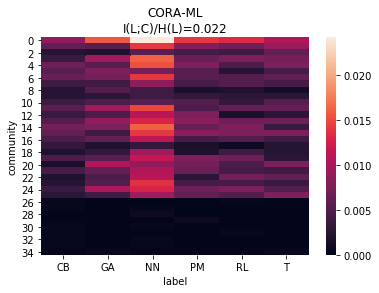

citeseer 2.467-2.385 = 0.082
citeseer IG/H = 0.033


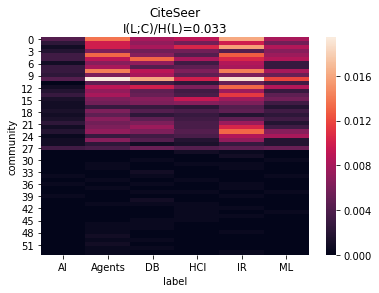

pubmed 1.530-1.525 = 0.005
pubmed IG/H = 0.003


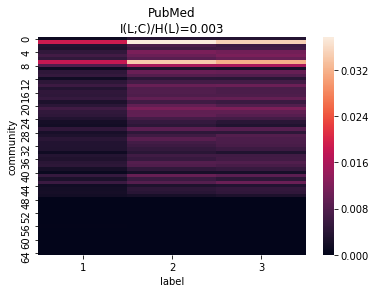

cora_full 5.748-5.653 = 0.095
cora_full IG/H = 0.016


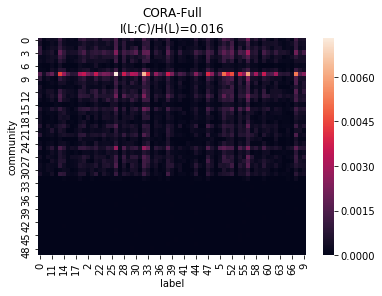

webkb 1.926-1.825 = 0.101
webkb IG/H = 0.053


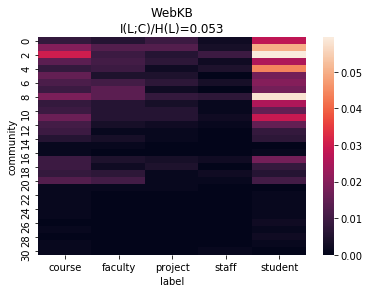

twitter 0.705-0.693 = 0.012
twitter IG/H = 0.017


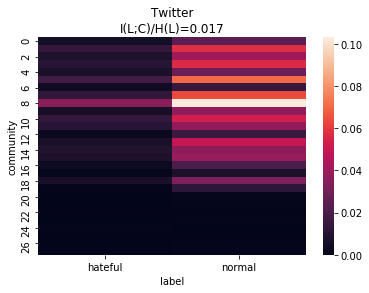

In [14]:
for dataset_name in datasets:
    
    community = load_communities(f'../data/community_id_dicts/confmodel/{dataset_name}-conf0')
    label = load_labels(f'../data/graphs/processed/{dataset_name}/{dataset_name}.content')
    df_community = pd.DataFrame({'dataset':dataset_name, 'node':node, 'community':community[node], 'label':label[node]} for node in community)
    
    if dataset_name == 'cora':
        df_community.label = df_community.label.apply(lambda x : ''.join([c for c in x if c.isupper()]))
    
    
    mtx = df_community.pivot_table(index='community', columns='label',values='node',aggfunc=agg).fillna(0) / len(label)
    plt.figure()
    sns.heatmap(mtx)
    
    communities = df_community.community.unique()
    labels = df_community.label.unique()
    
    def Pmarg(c):
        return len(df_community[df_community.community == c]) / len(df_community)
    
    def Pcond(l,c):
        return mtx.loc[c,l]/Pmarg(c)
    
    H = 0
    for c in communities:
        h = 0
        for l in labels:
            if Pcond(l,c) == 0:
                continue
            h += Pcond(l,c) * np.log2(1./Pcond(l,c))
        H += h * Pmarg(c)
    
    def Pl(l):
        return len(df_community[df_community.label == l]) / len(df_community)
    
    Hl = 0
    for l in labels:
        if Pl(l) == 0:
            continue
        Hl += Pl(l) * np.log2(1./Pl(l))
    
    IG = Hl-H
    
    print(f'{dataset_name} {Hl:.3f}-{H:.3f} = {IG:.3f}')
    print(f'{dataset_name} IG/H = {IG/Hl:.3f}')
    
    plt.title(f'{formal_name[dataset_name]}\nI(L;C)/H(L)={IG/Hl:.3f}')
    plt.savefig(f'../reports/figures/community_information_gain/conf_{dataset_name}.pdf',bbox_inches='tight')
    plt.show()

In [154]:
for dataset_name in datasets:
    dataset = GraphDataset(f'../data/tmp/{dataset_name}_directed', dataset_name,
                       f'../data/graphs/processed/{dataset_name}/{dataset_name}.cites',
                       f'../data/graphs/processed/{dataset_name}/{dataset_name}.content',
                       directed=True, reverse=False)[0]
    G = to_networkx(dataset)
#     scc = nx.strongly_connected_components(G)
    print(f'\n{dataset_name}: {len([x for x in nx.strongly_connected_components(G)])} SCCs')
    print(f'  {len([x for x in nx.strongly_connected_components(G) if len(x)>1])} bigger than one')
    print(f'  the largest is {len(max(nx.strongly_connected_components(G), key=len))}')
    
    


cora: 2315 SCCs
  111 bigger than one
  the largest is 13

citeseer: 2065 SCCs
  32 bigger than one
  the largest is 10

pubmed: 19706 SCCs
  11 bigger than one
  the largest is 2

cora_full: 15332 SCCs
  624 bigger than one
  the largest is 2268


In [155]:
print('SBMs')
for dataset_name in datasets:
    i = 0
    dataset = GraphDataset(f'../data/tmp/{dataset_name}_directed-sbm{i}', dataset_name,
                       f'../data/graphs/sbm/{dataset_name}/{dataset_name}_sbm_{i}.cites',
                       f'../data/graphs/processed/{dataset_name}/{dataset_name}.content',
                       directed=True, reverse=False)[0]
    G = to_networkx(dataset)
#     scc = nx.strongly_connected_components(G)
    print(f'\n{dataset_name}: {len([x for x in nx.strongly_connected_components(G)])} SCCs')
    print(f'  {len([x for x in nx.strongly_connected_components(G) if len(x)>1])} bigger than one')
    print(f'  the largest is {len(max(nx.strongly_connected_components(G), key=len))}')

SBMs

cora: 978 SCCs
  14 bigger than one
  the largest is 1389

citeseer: 1299 SCCs
  37 bigger than one
  the largest is 412

pubmed: 8103 SCCs
  21 bigger than one
  the largest is 11541

cora_full: 2304 SCCs
  15 bigger than one
  the largest is 16347


In [157]:
print('CMs')
for dataset_name in datasets:
    i = 0
    dataset = GraphDataset(f'../data/tmp/{dataset_name}_directed-confmodel{i}', dataset_name,
                       f'../data/graphs/confmodel/{dataset_name}/{dataset_name}_confmodel_{i}.cites',
                       f'../data/graphs/processed/{dataset_name}/{dataset_name}.content',
                       directed=True, reverse=False)[0]
    G = to_networkx(dataset)
#     scc = nx.strongly_connected_components(G)
    print(f'\n{dataset_name}: {len([x for x in nx.strongly_connected_components(G)])} SCCs')
    print(f'  {len([x for x in nx.strongly_connected_components(G) if len(x)>1])} bigger than one')
    print(f'  the largest is {len(max(nx.strongly_connected_components(G), key=len))}')

CMs

cora: 2225 SCCs
  2 bigger than one
  the largest is 259

citeseer: 2079 SCCs
  4 bigger than one
  the largest is 24

pubmed: 19001 SCCs
  2 bigger than one
  the largest is 716

cora_full: 11666 SCCs
  1 bigger than one
  the largest is 7038
